## Time Series Analysis on Sale- Regression Model

# Business understanding 

# Hypothesis
### Null Hypothesis: Promotions have no significant effect on product sales.
### Alternate Hypothesis:  Promotions positively impact product sales, leading to increased sales during promotional periods.


# 5 Analytic Question
 1)	What is the effect of seasonal variations (e.g., Monthly, or quarterly patterns) on total sales?
 2)	What store is the highest performer in terms of sales?
 3)	What are the best-selling products per location?
 4)	Does store size affect total sales?
 5)	Which days have the most sales?




### Python Libraries
### This section is to import all necessary libraries that will be used in the notebook

In [127]:
%pip install pyodbc  
%pip install python-dotenv 
%pip install openpyxl
%pip install --upgrade nbformat
%pip install plotly
%pip install jupyterlab ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### - Import all the necessary packages

In [128]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings 

warnings.filterwarnings('ignore')

## 3. Data preparation
### 3.1: Data Loading
### This is how the first dataset was retrieved from the SQL Server database. The second and third datasets were downloaded and imported.

In [129]:
environment_variables = dotenv_values('.env')
    
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
    
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
    
connection = pyodbc.connect(connection_string)

# Data for the Project
1. First dataset - the oil,holiday and stores data was extracted from Microsoft SQL Server
2. Second dataset - the train and transaction of the dataset was downloaded from a GitHub repository
3. Third dataset - The test and submission of the data was downloaded from Onedrive

In [130]:
# extract data from Table 1: dbo.oil
# assign it to data_oil
# preview data_oil

query="Select * from dbo.oil" 
data_oil=pd.read_sql(query, connection)

data_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [131]:
data_oil.shape

(1218, 2)

In [132]:
data_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [133]:
data_oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [134]:
# Save extracted data as data_oil.csv
data_oil['date'] = pd.to_datetime(data_oil['date'])  # Convert 'date' column to datetime if not already
data_oil.to_csv('data_oil.csv', index=False)  # Save the DataFrame to CSV without the index column

In [135]:
# rename column 'dcoilwtico' to oil_price in oil.csv

data_oil.rename(columns={'dcoilwtico':'oil_prices'}, inplace=True)
data_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   oil_prices  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [136]:
data_oil['year'] = data_oil['date'].dt.year
data_oil['month'] = data_oil['date'].dt.month
data_oil['day'] = data_oil['date'].dt.day

### EDA for oil dataset

#### imputing the missing values of oil_prices 

In [137]:
# Interpolate missing values using backward fill 

data_oil['oil_prices'].fillna(method='bfill', inplace=True)

print(data_oil)

           date  oil_prices  year  month  day
0    2013-01-01   93.139999  2013      1    1
1    2013-01-02   93.139999  2013      1    2
2    2013-01-03   92.970001  2013      1    3
3    2013-01-04   93.120003  2013      1    4
4    2013-01-07   93.199997  2013      1    7
...         ...         ...   ...    ...  ...
1213 2017-08-25   47.650002  2017      8   25
1214 2017-08-28   46.400002  2017      8   28
1215 2017-08-29   46.459999  2017      8   29
1216 2017-08-30   45.959999  2017      8   30
1217 2017-08-31   47.259998  2017      8   31

[1218 rows x 5 columns]


In [138]:
data_oil.isnull().sum()

date          0
oil_prices    0
year          0
month         0
day           0
dtype: int64

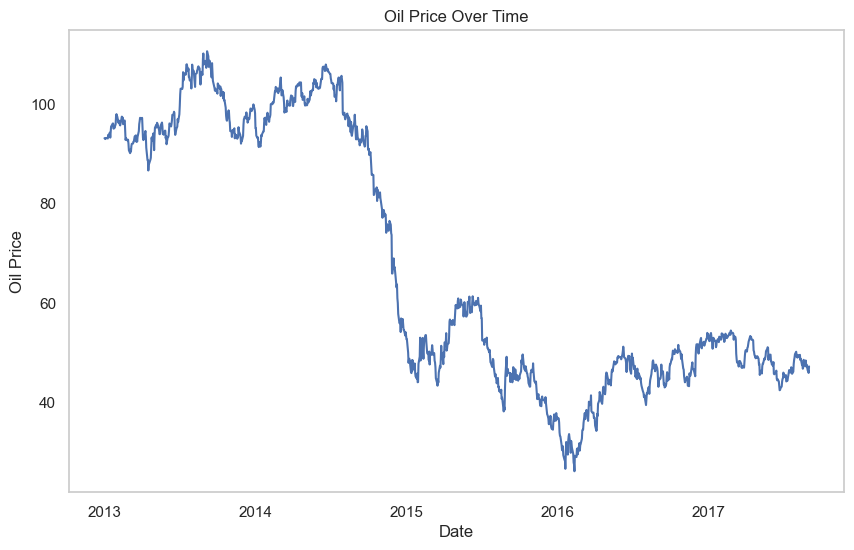

In [139]:
# Assuming your DataFrame is named data_oil
plt.figure(figsize=(10, 6))
plt.plot(data_oil['date'], data_oil['oil_prices'])#marker='o')
plt.title('Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.grid(False)
plt.show()

Looking at the plot, you can observe the general movement of the oil prices over the given time period. If the line is consistently moving upward, it indicates an upward trend, meaning that the oil prices have been increasing over time. Conversely, if the line is consistently moving downward, it indicates a downward trend, implying decreasing oil prices.
A steep incline or decline indicates rapid changes in oil prices, while a gentle slope suggests more gradual changes.
In 2013 to 2014 the graph shows the oil_price were increasing over time and the price drop at 2015 drastically. These anomalies could be due to external factors such as geopolitical events, natural disasters, economic shifts, or market dynamics.

In [140]:
# extract data from Table 2: dbo.holidays_events
# assign it to data_oil
# preview data_oil

query2="Select * from dbo.holidays_events" 
data_holiday=pd.read_sql(query2, connection)

data_holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [141]:
data_holiday.shape

(350, 6)

In [142]:
data_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


### checking the unique values of the columns 

In [143]:
unique_locale_name = data_holiday['locale_name'].unique()
print(unique_locale_name)

['Manta' 'Cotopaxi' 'Cuenca' 'Libertad' 'Riobamba' 'Puyo' 'Guaranda'
 'Imbabura' 'Latacunga' 'Machala' 'Santo Domingo' 'El Carmen' 'Cayambe'
 'Esmeraldas' 'Ecuador' 'Ambato' 'Ibarra' 'Quevedo'
 'Santo Domingo de los Tsachilas' 'Santa Elena' 'Quito' 'Loja' 'Salinas'
 'Guayaquil']


In [144]:
unique_locale = data_holiday['locale'].unique()
print(unique_locale)

['Local' 'Regional' 'National']


In [145]:
unique_description = data_holiday['description'].unique()
print(unique_description)

['Fundacion de Manta' 'Provincializacion de Cotopaxi'
 'Fundacion de Cuenca' 'Cantonizacion de Libertad'
 'Cantonizacion de Riobamba' 'Cantonizacion del Puyo'
 'Cantonizacion de Guaranda' 'Provincializacion de Imbabura'
 'Cantonizacion de Latacunga' 'Fundacion de Machala'
 'Fundacion de Santo Domingo' 'Cantonizacion de El Carmen'
 'Cantonizacion de Cayambe' 'Fundacion de Esmeraldas'
 'Primer Grito de Independencia' 'Fundacion de Riobamba'
 'Fundacion de Ambato' 'Fundacion de Ibarra' 'Cantonizacion de Quevedo'
 'Independencia de Guayaquil' 'Traslado Independencia de Guayaquil'
 'Dia de Difuntos' 'Independencia de Cuenca'
 'Provincializacion de Santo Domingo' 'Provincializacion Santa Elena'
 'Independencia de Guaranda' 'Independencia de Latacunga'
 'Independencia de Ambato' 'Fundacion de Quito-1' 'Fundacion de Quito'
 'Fundacion de Loja' 'Navidad-4' 'Cantonizacion de Salinas' 'Navidad-3'
 'Navidad-2' 'Puente Navidad' 'Navidad-1' 'Navidad' 'Navidad+1'
 'Puente Primer dia del ano' 'Primer 

In [146]:
data_holiday.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [147]:
# Save extracted data as data_holiday.csv
data_holiday['date'] = pd.to_datetime(data_holiday['date'])  # Convert 'date' column to datetime if not already
data_holiday.to_csv('data_holiday.csv', index=False)  # Save the DataFrame to CSV without the index column



In [148]:
data_holiday['year'] = data_holiday['date'].dt.year
data_holiday['month'] = data_holiday['date'].dt.month
data_holiday['day'] = data_holiday['date'].dt.day

### EDA for data_holiday

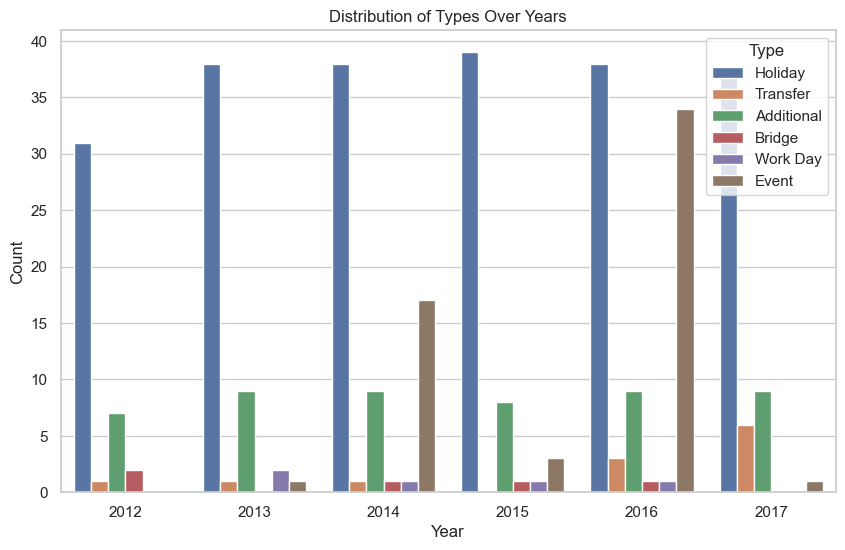

In [149]:


# Set the style for the plot
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_holiday, x='year', hue='type')
plt.title('Distribution of Types Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

You might notice trends or patterns in the distribution of holiday types. Certain types of holidays might be more common in some years than in others. In 2015 the graph shows that there were more holidays than the rest of the year and all the holidays was not transferred to the next day. In 2017 most of the holidays was transferred to different days.In 2016 it shows that most event was done in the country.

In [150]:

# Extract the year from the 'date' column
data_holiday['year'] = data_holiday['date'].dt.year
data_holiday['day'] = data_holiday['date'].dt.day
# Create a line graph with a slider
fig = px.line(data_holiday, x='date', y='transferred', color='type',
              title='Transferred Over Time by Type', labels={'date': 'Date', 'transferred': 'Transferred'})
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)))  # Add slider
fig.show()

From the graph, we can observe how the "transferred" status of different holiday types changes over time. By adjusting the slider, you can focus on specific date ranges and track the fluctuations in the "transferred" status for each holiday type.

In [151]:
# extract data from Table 3: dbo.stores
# assign it to data_stores
# preview data_stores

query3="Select * from dbo.stores" 
data_stores=pd.read_sql(query3, connection)

data_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [152]:
data_stores.shape

(54, 5)

In [153]:
data_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [154]:
data_stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [155]:
# Save extracted data as data3.csv

data_stores.to_csv('data_stores.csv')

### EDA for data_stores

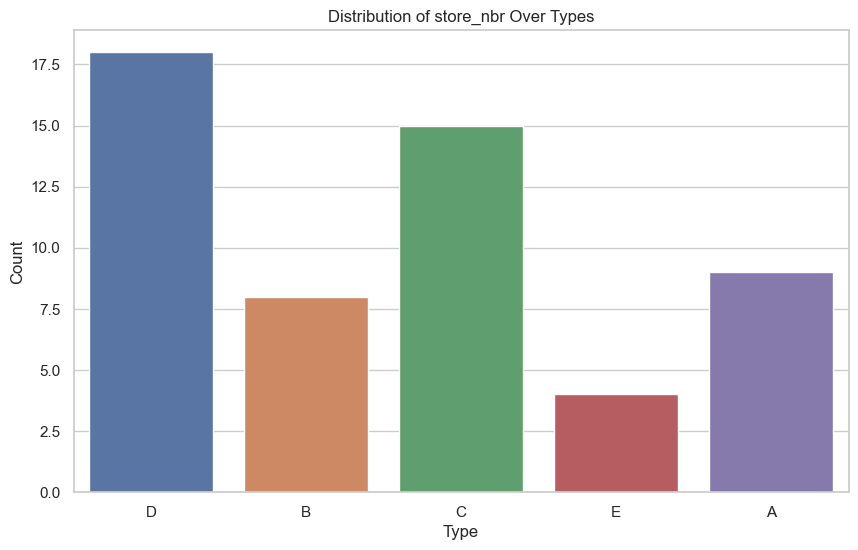

In [156]:
#distribution of store_nbr over types
# Set the style for the plot
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_stores, x='type')
plt.title('Distribution of store_nbr Over Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

The bar plot displays the distribution of store_nbr over different types of stores. Each bar on the plot represents a specific type of store, and the height of the bar indicates the count of stores belonging to that type. 

From the plot, you can observe which type of store (A, B, or C) is the most common among the given store numbers. D has the highest frequency followed by C and A type.

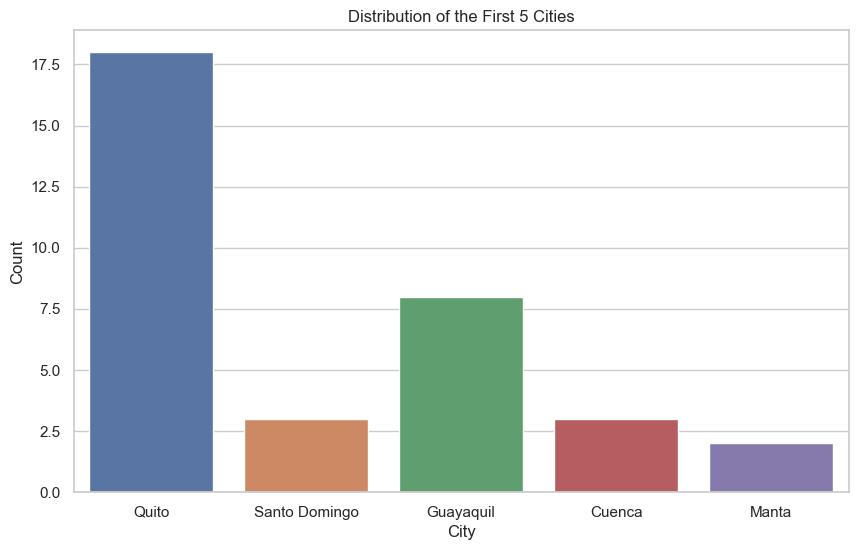

In [157]:
#Distribution of cities and Clusters
# Set the style for the plot
sns.set(style='whitegrid')
# Filter the data for the first 5 cities
first_5_cities = data_stores['city'].value_counts().head(5).index
data_first_5_cities = data_stores[data_stores['city'].isin(first_5_cities)]

# Create a bar plot for the distribution of the first 5 cities
plt.figure(figsize=(10, 6))
sns.countplot(data=data_first_5_cities, x='city')
plt.title('Distribution of the First 5 Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()



The first bar plot displays the distribution of stores across different cities. Each bar on the plot represents a specific city, and the height of the bar indicates the count of stores located in that city.  The plot gives an overview of the geographical distribution of the stores.

The second bar plot shows the distribution of stores across different clusters. Each bar corresponds to a cluster, and the height of the bar represents the count of stores belonging to that cluster.  The plot provides insights into how the stores are grouped into different clusters, which might reflect certain patterns or characteristics shared among them

### Does store size affect total sales?

In [158]:
# Group the data by cluster and calculate total sales for each cluster
sales_by_cluster = data_stores.groupby('cluster')['store_nbr'].count()

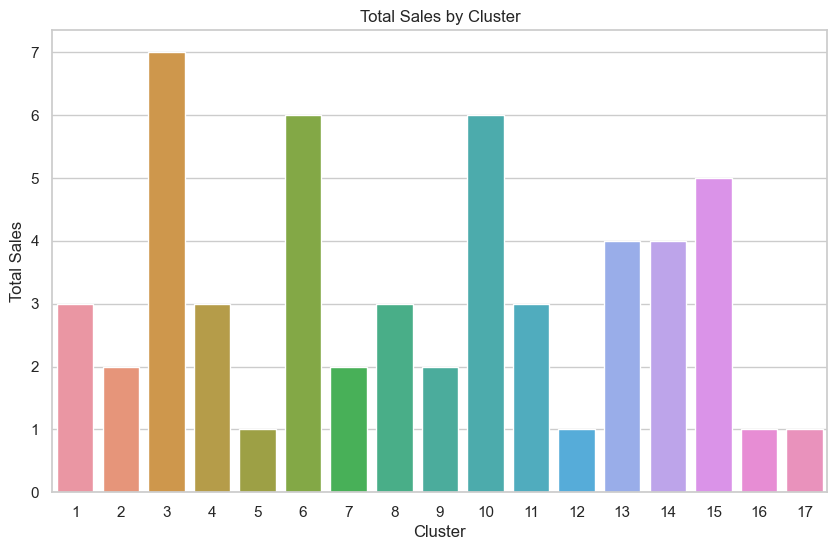

In [159]:
# Create a bar plot for sales by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_cluster.index, y=sales_by_cluster.values)
plt.title('Total Sales by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


The  plot shows the Total Sales across different clusters. Each bar corresponds to a cluster, and the height of the bar represents theTotal Sales belonging to that cluster.  The plot provides insights into how theTotal sales are grouped into different clusters, which might reflect certain patterns or characteristics shared among them

In [160]:
data_sub = pd.read_excel('E:/LP3 dataset/sample_submission.xlsx')

In [161]:
data_sub.head(5)

,id,sales
0,3000888,0
1,3000889,0
2,3000890,0
3,3000891,0
4,3000892,0


In [162]:
data_trans = pd.read_csv('E:/LP3 dataset/transactions.csv', parse_dates=['date'])

In [163]:
data_trans.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [164]:
data_trans.shape

(83488, 3)

In [165]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [166]:
data_trans['year'] = data_trans['date'].dt.year
data_trans['month'] = data_trans['date'].dt.month
data_trans['day'] = data_trans['date'].dt.day

In [167]:
data_trans.isnull().sum()

date            0
store_nbr       0
transactions    0
year            0
month           0
day             0
dtype: int64

### EDA on transactions 

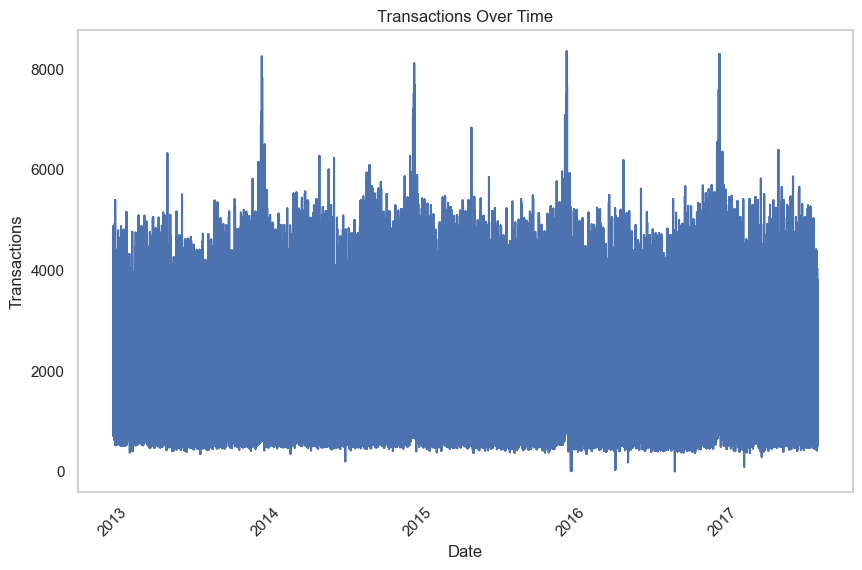

In [168]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(data_trans['date'], data_trans['transactions'], linestyle='-', color='b')
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

The graph  depicts the trend of transactions for a given period. The x-axis represents the timeline, progressing from earlier dates on the left to later dates on the right. The y-axis represents the number of transactions recorded for each corresponding date. There is fluctuation in the transaction counts over time, with some periods experiencing higher transaction activity than others.
The plot shows both upward and downward trends in transaction counts, suggesting varying customer engagement or external factors impacting sales.


In [169]:
data_test= pd.read_excel('E:/LP3 dataset/test.xlsx', parse_dates=['date'])

In [170]:
data_test.head(5)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [171]:
data_test.shape

(28512, 5)

In [172]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [173]:
data_test['year'] = data_test['date'].dt.year
data_test['month'] = data_test['date'].dt.month
data_test['day'] = data_test['date'].dt.day

In [174]:
data_test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
year           0
month          0
day            0
dtype: int64

In [175]:
data_train= pd.read_csv('E:/LP3 dataset/train.csv', parse_dates=['date'])

In [176]:
data_train.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [177]:
data_train.shape

(3000888, 6)

In [178]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [179]:
data_train['year'] = data_train['date'].dt.year
data_train['month'] = data_train['date'].dt.month
data_train['day'] = data_train['date'].dt.day

In [180]:
data_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
year           0
month          0
day            0
dtype: int64

### EDA of train data

#### Which dates have the lowest and highest sales for each year?

In [181]:

# Extract the year from the 'date' column
data_train['year'] = data_train['date'].dt.year

# Group the data by year and date, and calculate total sales
grouped_sales = data_train.groupby(['year', 'date'])['sales'].sum().reset_index()

# Find dates with lowest and highest sales for each year
lowest_sales_dates = grouped_sales.groupby('year')['date'].min()
highest_sales_dates = grouped_sales.groupby('year')['date'].max()

# Print the results
for year, lowest_date, highest_date in zip(lowest_sales_dates.index, lowest_sales_dates, highest_sales_dates):
    print(f"Year: {year}, Lowest Sales Date: {lowest_date}, Highest Sales Date: {highest_date}")

Year: 2013, Lowest Sales Date: 2013-01-01 00:00:00, Highest Sales Date: 2013-12-31 00:00:00
Year: 2014, Lowest Sales Date: 2014-01-01 00:00:00, Highest Sales Date: 2014-12-31 00:00:00
Year: 2015, Lowest Sales Date: 2015-01-01 00:00:00, Highest Sales Date: 2015-12-31 00:00:00
Year: 2016, Lowest Sales Date: 2016-01-01 00:00:00, Highest Sales Date: 2016-12-31 00:00:00
Year: 2017, Lowest Sales Date: 2017-01-01 00:00:00, Highest Sales Date: 2017-08-15 00:00:00


In [182]:
result_df = pd.DataFrame({
    'Year': lowest_sales_dates.index,
    'Lowest Sales Date': lowest_sales_dates,
    'Highest Sales Date': highest_sales_dates
})

# Print the DataFrame
print(result_df)

      Year Lowest Sales Date Highest Sales Date
year                                           
2013  2013        2013-01-01         2013-12-31
2014  2014        2014-01-01         2014-12-31
2015  2015        2015-01-01         2015-12-31
2016  2016        2016-01-01         2016-12-31
2017  2017        2017-01-01         2017-08-15


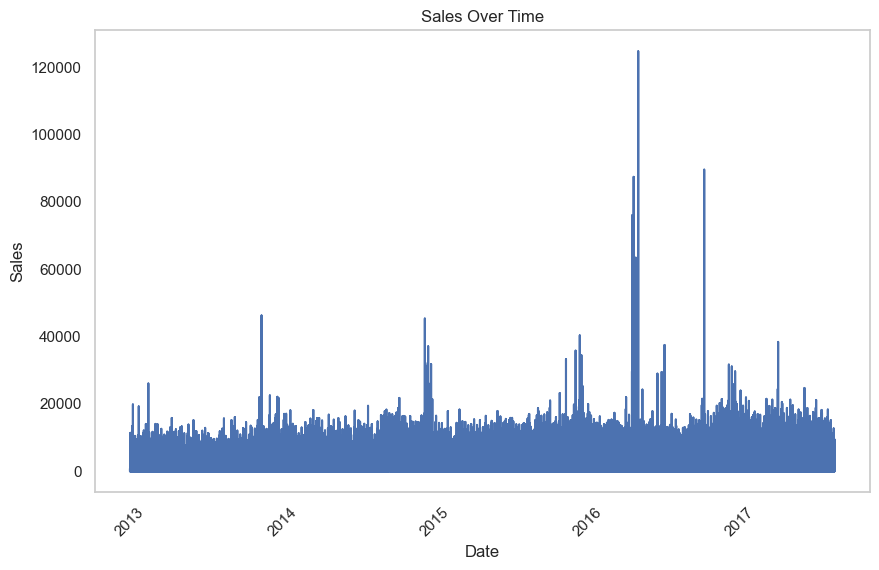

In [183]:
# Assuming your DataFrame is named 'data_train'
plt.figure(figsize=(10, 6))
plt.plot(data_train['date'], data_train['sales'], linestyle='-', color='b')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()



From the graph, we can observe fluctuations in sales over time. There are periods of higher sales, followed by periods of lower sales. Peaks in the line indicate moments of increased demand or successful promotions, while dips may suggest slower business periods.

### Did the earthquake impact sales?

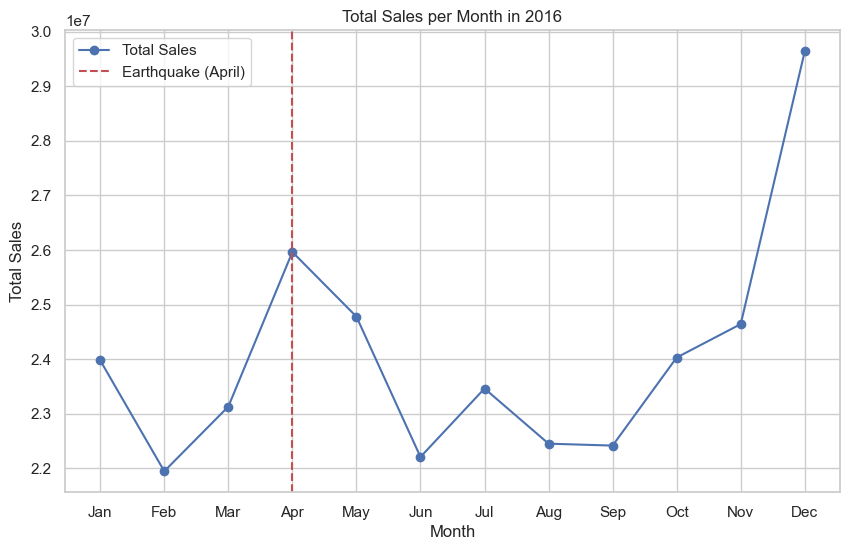

In [184]:
data_2016 = data_train[data_train['date'].dt.year == 2016]

# Group data by month and calculate total sales
monthly_sales = data_2016.groupby(data_2016['date'].dt.month)['sales'].sum()

# Create a line plot for total sales per month
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='b', label='Total Sales')

# Highlight the month of April 2016 (earthquake month)
plt.axvline(x=4, color='r', linestyle='--', label='Earthquake (April)')

plt.title('Total Sales per Month in 2016')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

 The  graph, shows how the  the monthly fluctuations in total sales throughout the year 2016. The red dashed line indicating the earthquake month shows there was a significant impact on sales during that period compared to the rest of the months. This shows that most people bought supplies.

### What store is the highest performer in terms of sales?

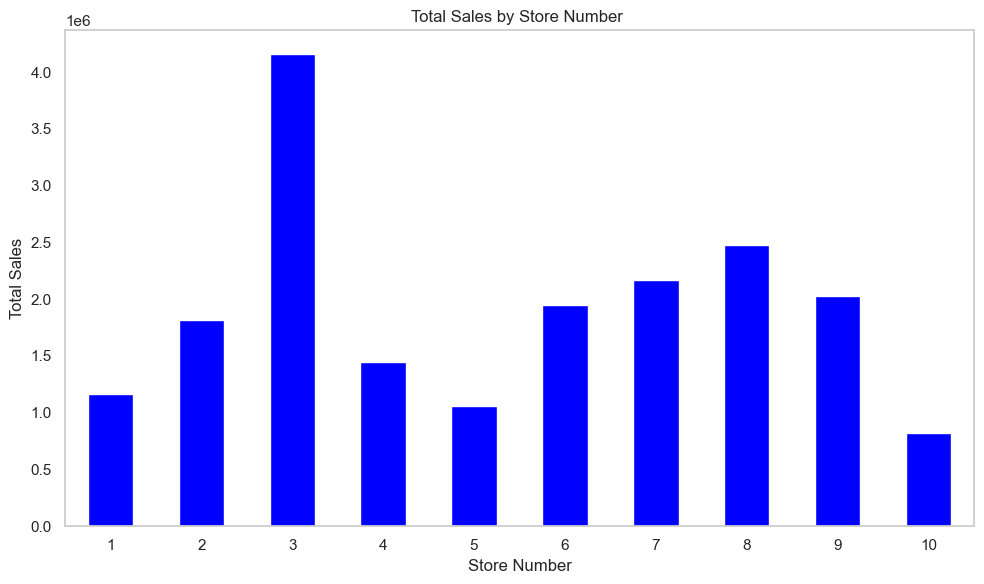

In [185]:
# Filter the DataFrame where onpromotion is True
filtered_df = data_train[data_train['onpromotion'] == 1]

# Group by 'store_nbr' and calculate the sum of 'sales' for each store
store_sales = filtered_df.groupby('store_nbr')['sales'].sum()

# Get the first ten store sales
first_ten_store_sales = store_sales.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
first_ten_store_sales.plot(kind='bar', color='blue')
plt.title('Total Sales by Store Number ')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.xticks(rotation=360)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.grid(False)
plt.show()

From the graph, we can observe that store numbers 3 and 8 have notably higher total sales compared to the other stores within the selected subset. 

### Which days have the most sales?

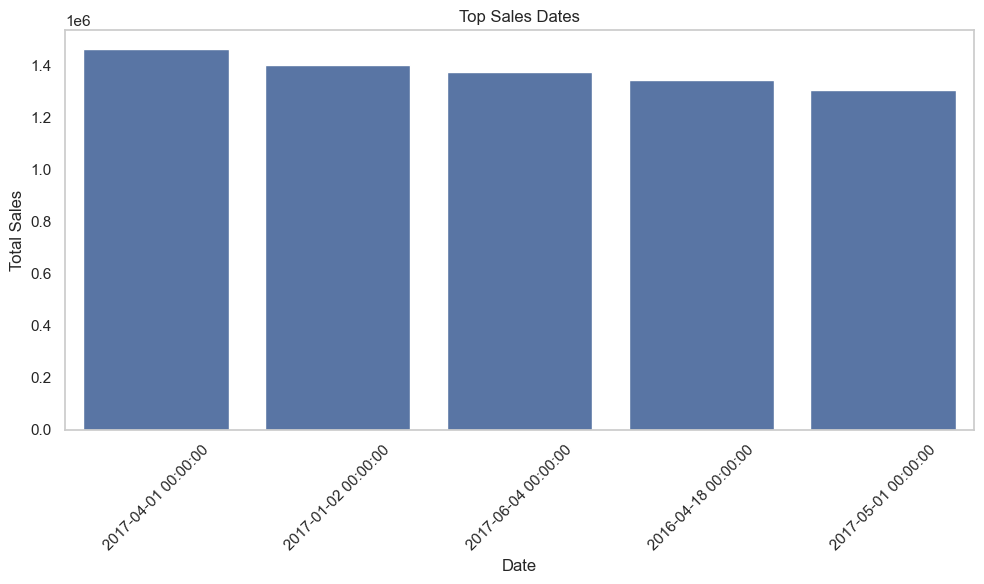

In [186]:
# Group the data_train by 'date' and calculate total sales for each date
daily_sales = data_train.groupby('date')['sales'].sum()

# Sort the grouped data_train in descending order based on total sales
sorted_daily_sales = daily_sales.sort_values(ascending=False)

# Retrieve the top N dates with the most sales
top_sales_dates = sorted_daily_sales.head(5)  # Change the number of top dates if needed

# Plot the top sales dates using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sales_dates.index, y=top_sales_dates.values, color='b')
plt.title('Top Sales Dates')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()







From the graph 2017-04-01 had the most total of sales within the year. And in the year 2016-04-18 had the most total of sales because of the earthquake 

### What is the effect of seasonal variations (e.g., Monthly, or quarterly patterns) on total sales?

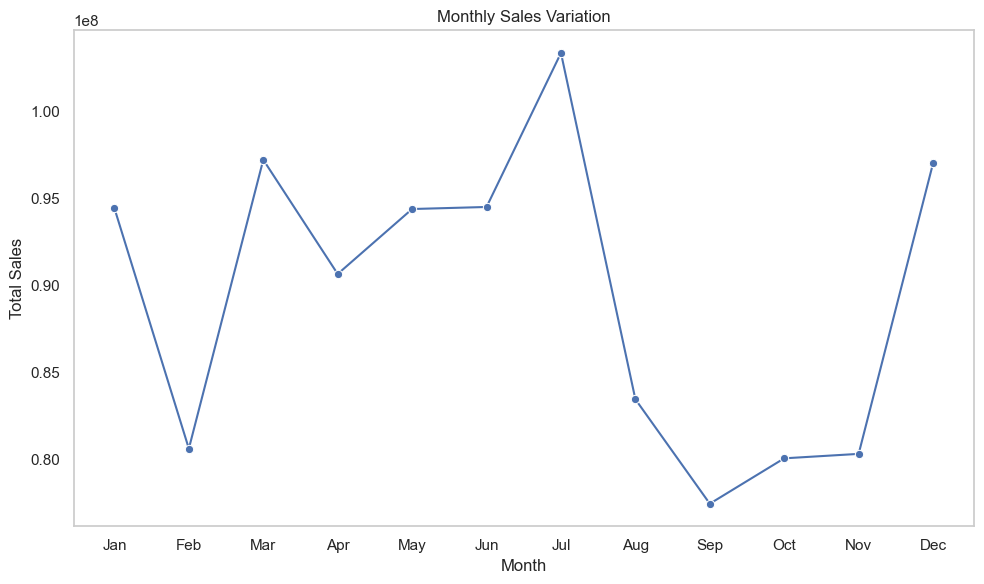

In [187]:
# Group the data_train by 'month' and calculate total sales for each month
monthly_sales = data_train.groupby('month')['sales'].sum()

# Plot the monthly sales using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Variation')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(False)
plt.tight_layout()
plt.show()







The line plot titled "Monthly Sales Variation" illustrates the effect of seasonal variations on total sales throughout the year. The line represents a month, and its corresponding vertical position indicates the total sales achieved in that specific month From the graph, we can observe fluctuations in total sales across different months. There are certain months, such as November and December, where sales peak, indicating a surge in demand, possibly due to holiday shopping. On the other hand, there are months, such as January and February, where sales appear to dip, possibly due to post-holiday lulls.

### Checking the range of date 

In [188]:
# cheacking the range of date on data_oil
data_oil['date'].min(),data_oil['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

In [189]:
# cheacking the range of date on holiday
data_holiday['date'].min(),data_holiday['date'].max()

(Timestamp('2012-03-02 00:00:00'), Timestamp('2017-12-26 00:00:00'))

In [190]:
# cheacking the range of date on transaction 
data_trans['date'].min(),data_trans['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [191]:
# cheacking the range of date on train  
data_train['date'].min(),data_train['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [192]:
# cheacking the range of date on test 
data_test['date'].min(),data_test['date'].max()

(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))

### splitting the data_oil date 

In [193]:
data_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   oil_prices  1218 non-null   float64       
 2   year        1218 non-null   int32         
 3   month       1218 non-null   int32         
 4   day         1218 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3)
memory usage: 33.4 KB


In [194]:

# split oil.csv on the dates that reflects the split for the test and train
#define the start and end dates for the oil.csv that will be joined to the test

data_oil_test_start_date= '2017-08-16'
data_oil_test_end_date= '2017-08-31'

# Filtering data for the training date range
data_oil_train = data_oil[(data_oil['date'] < data_oil_test_start_date)]
range_oil_train = data_oil_train['date'].min(), data_oil_train['date'].max()
print(range_oil_train)
# Filter data for the specified date range
data_oil_test = data_oil[(data_oil['date'] >= data_oil_test_start_date) & (data_oil['date'] <= data_oil_test_end_date)]
range_oil_test = data_oil_test['date'].min(), data_oil_test['date'].max()
print(range_oil_test)

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))
(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))


### Merging the dataset 

In [195]:
# Drop unwanted columns from data_oil_test
data_oil_test = data_oil_test.drop(['year', 'month', 'day'], axis=1)

# Merge data_test and modified data_oil_test on 'date'
merged_test = pd.merge(data_test, data_oil_test, on='date', how='left')

print(merged_test.head())

        id       date  store_nbr      family  onpromotion  year  month  day  \
0  3000888 2017-08-16          1  AUTOMOTIVE            0  2017      8   16   
1  3000889 2017-08-16          1   BABY CARE            0  2017      8   16   
2  3000890 2017-08-16          1      BEAUTY            2  2017      8   16   
3  3000891 2017-08-16          1   BEVERAGES           20  2017      8   16   
4  3000892 2017-08-16          1       BOOKS            0  2017      8   16   

   oil_prices  
0   46.799999  
1   46.799999  
2   46.799999  
3   46.799999  
4   46.799999  


In [196]:
#check for null or missing values

merged_test.isnull().sum()

id                0
date              0
store_nbr         0
family            0
onpromotion       0
year              0
month             0
day               0
oil_prices     7128
dtype: int64

In [197]:
merged_test.shape

(28512, 9)

In [198]:
# merge train and data_oil_train_interpolated datasets
# Drop unwanted columns from data_oil_test
data_oil_train = data_oil_train.drop(['year', 'month', 'day'], axis=1)

# Merge data_test and modified data_oil_test on 'date'
merged_train = pd.merge(data_train, data_oil_train, on='date', how='left')

print(merged_train.head())

   id       date  store_nbr      family  sales  onpromotion  year  month  day  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013      1    1   
1   1 2013-01-01          1   BABY CARE    0.0            0  2013      1    1   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013      1    1   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013      1    1   
4   4 2013-01-01          1       BOOKS    0.0            0  2013      1    1   

   oil_prices  
0   93.139999  
1   93.139999  
2   93.139999  
3   93.139999  
4   93.139999  


In [199]:
merged_train.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
year                0
month               0
day                 0
oil_prices     857142
dtype: int64

In [200]:
merged_train.shape

(3000888, 10)

In [201]:
# join transactions and stores on 'store_nbr'
transactions_store = pd.merge(data_trans, data_stores, on='store_nbr', how='left')
print(transactions_store.head())


        date  store_nbr  transactions  year  month  day     city        state  \
0 2013-01-01         25           770  2013      1    1  Salinas  Santa Elena   
1 2013-01-02          1          2111  2013      1    2    Quito    Pichincha   
2 2013-01-02          2          2358  2013      1    2    Quito    Pichincha   
3 2013-01-02          3          3487  2013      1    2    Quito    Pichincha   
4 2013-01-02          4          1922  2013      1    2    Quito    Pichincha   

  type  cluster  
0    D        1  
1    D       13  
2    D       13  
3    D        8  
4    D        9  


In [202]:
#checking the null value of the transactions_store
transactions_store.isnull().sum()

date            0
store_nbr       0
transactions    0
year            0
month           0
day             0
city            0
state           0
type            0
cluster         0
dtype: int64

In [203]:
# cheacking the range of date on the  transaction_store 
transactions_store['date'].min(),transactions_store['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

splitting the transaction_store date

In [204]:
#splitting the transactions_store date
# Define start and end dates for train and test sets
transactions_store_start_date = pd.Timestamp('2013-01-01')
transactions_store_end_date = pd.Timestamp('2017-08-15')

# Filter the DataFrame to get training and testing data
transactions_store_train = transactions_store[
    (transactions_store['date'] >= transactions_store_start_date) &
    (transactions_store['date'] <= transactions_store_end_date)
]

transactions_store_test = transactions_store[
    transactions_store['date'] > transactions_store_end_date
]

# Verify the split
transactions_store_train_min_date = transactions_store_train['date'].min()
transactions_store_train_max_date = transactions_store_train['date'].max()
transactions_store_test_min_date = transactions_store_test['date'].min()
transactions_store_test_max_date = transactions_store_test['date'].max()

print("Train Set Date Range:", transactions_store_train_min_date, "to", transactions_store_train_max_date)
print("Test Set Date Range:", transactions_store_test_min_date, "to", transactions_store_test_max_date)

Train Set Date Range: 2013-01-01 00:00:00 to 2017-08-15 00:00:00
Test Set Date Range: NaT to NaT


In pandas, NaT stands for "Not a Timestamp" and represents missing or undefined values in datetime-related data. Since the transactions_store dataset has the same timestamp as the train we decided to maintain the timestamp for the train and use NaT for the test data

Merging the transactions_store to the train and test data 

In [205]:
# merge test and transactions_store on 'date' on the test data


train_tran = pd.merge(merged_train, transactions_store_train, how='left')

print(train_tran.head())

   id       date  store_nbr      family  sales  onpromotion  year  month  day  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013      1    1   
1   1 2013-01-01          1   BABY CARE    0.0            0  2013      1    1   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013      1    1   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013      1    1   
4   4 2013-01-01          1       BOOKS    0.0            0  2013      1    1   

   oil_prices  transactions city state type  cluster  
0   93.139999           NaN  NaN   NaN  NaN      NaN  
1   93.139999           NaN  NaN   NaN  NaN      NaN  
2   93.139999           NaN  NaN   NaN  NaN      NaN  
3   93.139999           NaN  NaN   NaN  NaN      NaN  
4   93.139999           NaN  NaN   NaN  NaN      NaN  


In [206]:
unique_types = train_tran['type'].unique()
print("Unique values in 'type' column:", unique_types)

Unique values in 'type' column: [nan 'D' 'C' 'B' 'E' 'A']


In [207]:
train_tran.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
year                 0
month                0
day                  0
oil_prices      857142
transactions    245784
city            245784
state           245784
type            245784
cluster         245784
dtype: int64

In [208]:
train_tran.shape

(3000888, 15)

In [209]:
#merging the merged_test with the transactions_store 
test_tran = pd.merge(merged_test, transactions_store_test, how='left')

print(test_tran.head())

        id       date  store_nbr      family  onpromotion  year  month  day  \
0  3000888 2017-08-16          1  AUTOMOTIVE            0  2017      8   16   
1  3000889 2017-08-16          1   BABY CARE            0  2017      8   16   
2  3000890 2017-08-16          1      BEAUTY            2  2017      8   16   
3  3000891 2017-08-16          1   BEVERAGES           20  2017      8   16   
4  3000892 2017-08-16          1       BOOKS            0  2017      8   16   

   oil_prices  transactions city state type  cluster  
0   46.799999           NaN  NaN   NaN  NaN      NaN  
1   46.799999           NaN  NaN   NaN  NaN      NaN  
2   46.799999           NaN  NaN   NaN  NaN      NaN  
3   46.799999           NaN  NaN   NaN  NaN      NaN  
4   46.799999           NaN  NaN   NaN  NaN      NaN  


In [210]:
test_tran.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
year                0
month               0
day                 0
oil_prices       7128
transactions    28512
city            28512
state           28512
type            28512
cluster         28512
dtype: int64

In [211]:
test_tran.shape

(28512, 14)

In [212]:
train_tran.head(2)

,id,date,store_nbr,family,sales,onpromotion,year,month,day,oil_prices,transactions,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,93.139999,NaN,NaN,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,93.139999,NaN,NaN,NaN,NaN,NaN


In [213]:
# cheacking the range of date on the  train_tran
train_tran['date'].min(),train_tran['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [214]:
# cheacking the range of date on the test_tran 
test_tran['date'].min(),test_tran['date'].max()

(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))

In [215]:
train_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 15 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   year          int32         
 7   month         int32         
 8   day           int32         
 9   oil_prices    float64       
 10  transactions  float64       
 11  city          object        
 12  state         object        
 13  type          object        
 14  cluster       float64       
dtypes: datetime64[ns](1), float64(4), int32(3), int64(3), object(4)
memory usage: 309.1+ MB


dropping some of the column at the holiday data 

In [216]:
data_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
 6   year         350 non-null    int32         
 7   month        350 non-null    int32         
 8   day          350 non-null    int32         
dtypes: bool(1), datetime64[ns](1), int32(3), object(4)
memory usage: 18.2+ KB


In [217]:
# Drop the specified columns
data_holiday = data_holiday.drop(['locale', 'locale_name', 'description'], axis=1)

In [218]:
data_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   transferred  350 non-null    bool          
 3   year         350 non-null    int32         
 4   month        350 non-null    int32         
 5   day          350 non-null    int32         
dtypes: bool(1), datetime64[ns](1), int32(3), object(1)
memory usage: 10.0+ KB


In [219]:
# Drop duplicate rows
data_holiday_duplicates = data_holiday.drop_duplicates()


In [220]:
data_holiday_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         330 non-null    datetime64[ns]
 1   type         330 non-null    object        
 2   transferred  330 non-null    bool          
 3   year         330 non-null    int32         
 4   month        330 non-null    int32         
 5   day          330 non-null    int32         
dtypes: bool(1), datetime64[ns](1), int32(3), object(1)
memory usage: 11.9+ KB


In [221]:
# Convert 'transferred' column from bool to object
#data_holiday['transferred'] = data_holiday['transferred'].astype(str)

In [222]:
data_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   transferred  350 non-null    bool          
 3   year         350 non-null    int32         
 4   month        350 non-null    int32         
 5   day          350 non-null    int32         
dtypes: bool(1), datetime64[ns](1), int32(3), object(1)
memory usage: 10.0+ KB


In [223]:
data_holiday_duplicates.head(20)

,date,type,transferred,year,month,day
0,2012-03-02,Holiday,False,2012,3,2
1,2012-04-01,Holiday,False,2012,4,1
2,2012-04-12,Holiday,False,2012,4,12
3,2012-04-14,Holiday,False,2012,4,14
4,2012-04-21,Holiday,False,2012,4,21
5,2012-05-12,Holiday,False,2012,5,12
6,2012-06-23,Holiday,False,2012,6,23
7,2012-06-25,Holiday,False,2012,6,25
10,2012-07-03,Holiday,False,2012,7,3
12,2012-07-23,Holiday,False,2012,7,23


In [224]:
# cheacking the range of date on the test_tran 
data_holiday_duplicates['date'].min(),data_holiday_duplicates['date'].max()

(Timestamp('2012-03-02 00:00:00'), Timestamp('2017-12-26 00:00:00'))

In [225]:
#Define date ranges as datetime objects
data_holiday_duplicates_test_start_date = pd.to_datetime('2017-08-16')
data_holiday_duplicates_test_end_date = pd.to_datetime('2017-08-31')

data_holiday_duplicates_train_start_date = pd.to_datetime('2013-01-01')
data_holiday_duplicates_train_end_date = pd.to_datetime('2017-08-15')

# Assuming you have a DataFrame called data_holiday_duplicates
train_holiday = data_holiday_duplicates[data_holiday_duplicates['date'].between(data_holiday_duplicates_train_start_date, data_holiday_duplicates_train_end_date)]
test_holiday = data_holiday_duplicates[data_holiday_duplicates['date'].between(data_holiday_duplicates_test_start_date, data_holiday_duplicates_test_end_date)]

# Verify the split
range_train_holiday = (train_holiday['date'].min(), train_holiday['date'].max())
range_test_holiday = (test_holiday['date'].min(), test_holiday['date'].max())

print(range_train_holiday)
print(range_test_holiday)

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))
(Timestamp('2017-08-24 00:00:00'), Timestamp('2017-08-24 00:00:00'))


In [226]:
train_holiday.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 41 to 326
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         269 non-null    datetime64[ns]
 1   type         269 non-null    object        
 2   transferred  269 non-null    bool          
 3   year         269 non-null    int32         
 4   month        269 non-null    int32         
 5   day          269 non-null    int32         
dtypes: bool(1), datetime64[ns](1), int32(3), object(1)
memory usage: 9.7+ KB


In [227]:

# Now we can merge the train and test data_holiday data with the respective train and test datasets
train = train_tran.merge(train_holiday, on=['date', 'year', 'month', 'day'], how='left')
test = test_tran.merge(test_holiday, on=['date', 'year', 'month', 'day'], how='left')


# Rename the 'type_x' and 'type_y' columns to 'type'
#train.rename(columns={'type_x': 'type'}, inplace=True)
#test.rename(columns={'type_y': 'type'}, inplace=True)



In [228]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024054 entries, 0 to 3024053
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   year          int32         
 7   month         int32         
 8   day           int32         
 9   oil_prices    float64       
 10  transactions  float64       
 11  city          object        
 12  state         object        
 13  type_x        object        
 14  cluster       float64       
 15  type_y        object        
 16  transferred   object        
dtypes: datetime64[ns](1), float64(4), int32(3), int64(3), object(6)
memory usage: 357.6+ MB


In [229]:
# Check unique values of 'type' column
unique_types = train['type_x'].unique()
print("Unique values in 'type_x' column:", unique_types)

# Check unique values of 'type_y' column
unique_types_y = train['type_y'].unique()
print("Unique values in 'type_y' column:", unique_types_y)

unique_transferred = train['transferred'].unique()
print("Unique values in 'transferred' column:", unique_transferred)


Unique values in 'type_x' column: [nan 'D' 'C' 'B' 'E' 'A']
Unique values in 'type_y' column: ['Holiday' nan 'Work Day' 'Additional' 'Event' 'Transfer' 'Bridge']
Unique values in 'transferred' column: [False nan True]


In [230]:
#drooping the type_x column 
train = train.drop('type_x', axis=1)
test = test.drop('type_y',axis=1)

In [231]:
# rename the type_x and type_y in both the train and test column 
# Rename the 'type_x' and 'type_y' columns to 'type' in the train
train.rename(columns={'type_y': 'type'}, inplace=True)

# Print the updated DataFrame to verify the column names
print(train.head())

   id       date  store_nbr      family  sales  onpromotion  year  month  day  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013      1    1   
1   1 2013-01-01          1   BABY CARE    0.0            0  2013      1    1   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013      1    1   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013      1    1   
4   4 2013-01-01          1       BOOKS    0.0            0  2013      1    1   

   oil_prices  transactions city state  cluster     type transferred  
0   93.139999           NaN  NaN   NaN      NaN  Holiday       False  
1   93.139999           NaN  NaN   NaN      NaN  Holiday       False  
2   93.139999           NaN  NaN   NaN      NaN  Holiday       False  
3   93.139999           NaN  NaN   NaN      NaN  Holiday       False  
4   93.139999           NaN  NaN   NaN      NaN  Holiday       False  


In [232]:
# Rename the 'type_x' and 'type_y' columns to 'type'
test.rename(columns={'type_x': 'type'}, inplace=True)

# Print the updated DataFrame to verify the column names
print(test.head())

        id       date  store_nbr      family  onpromotion  year  month  day  \
0  3000888 2017-08-16          1  AUTOMOTIVE            0  2017      8   16   
1  3000889 2017-08-16          1   BABY CARE            0  2017      8   16   
2  3000890 2017-08-16          1      BEAUTY            2  2017      8   16   
3  3000891 2017-08-16          1   BEVERAGES           20  2017      8   16   
4  3000892 2017-08-16          1       BOOKS            0  2017      8   16   

   oil_prices  transactions city state type  cluster transferred  
0   46.799999           NaN  NaN   NaN  NaN      NaN         NaN  
1   46.799999           NaN  NaN   NaN  NaN      NaN         NaN  
2   46.799999           NaN  NaN   NaN  NaN      NaN         NaN  
3   46.799999           NaN  NaN   NaN  NaN      NaN         NaN  
4   46.799999           NaN  NaN   NaN  NaN      NaN         NaN  


In [233]:
# cheacking the range of date on the train
train['date'].min(),train['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [234]:
train.head(2)

,id,date,store_nbr,family,sales,onpromotion,year,month,day,oil_prices,transactions,city,state,cluster,type,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,93.139999,NaN,NaN,NaN,NaN,Holiday,False
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,93.139999,NaN,NaN,NaN,NaN,Holiday,False


In [235]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024054 entries, 0 to 3024053
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   year          int32         
 7   month         int32         
 8   day           int32         
 9   oil_prices    float64       
 10  transactions  float64       
 11  city          object        
 12  state         object        
 13  cluster       float64       
 14  type          object        
 15  transferred   object        
dtypes: datetime64[ns](1), float64(4), int32(3), int64(3), object(5)
memory usage: 334.5+ MB


In [236]:
train.shape

(3024054, 16)

In [237]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            28512 non-null  int64         
 1   date          28512 non-null  datetime64[ns]
 2   store_nbr     28512 non-null  int64         
 3   family        28512 non-null  object        
 4   onpromotion   28512 non-null  int64         
 5   year          28512 non-null  int32         
 6   month         28512 non-null  int32         
 7   day           28512 non-null  int32         
 8   oil_prices    21384 non-null  float64       
 9   transactions  0 non-null      float64       
 10  city          0 non-null      object        
 11  state         0 non-null      object        
 12  type          0 non-null      object        
 13  cluster       0 non-null      float64       
 14  transferred   1782 non-null   object        
dtypes: datetime64[ns](1), float64(3), in

In [238]:
test.shape

(28512, 15)

In [239]:
#drooping the id column 
train = train.drop('id', axis=1)
test = test.drop('id',axis=1)

In [240]:
#dropping the cluster column 
train = train.drop('cluster',axis=1)
test = test.drop('cluster',axis=1)

In [241]:
test.shape

(28512, 13)

In [242]:
train.shape

(3024054, 14)

## imputing the missing values in the train and test data 

In [243]:
train.isnull().sum()

date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
year                  0
month                 0
day                   0
oil_prices       867834
transactions     247170
city             247170
state            247170
type            2551824
transferred     2551824
dtype: int64

In [245]:
#imputing the missing value 
train['oil_prices'].fillna(method='bfill', inplace=True)
train['transactions'].fillna(method='bfill', inplace=True)
train['city'].fillna(method='bfill', inplace=True)
train['state'].fillna(method='bfill', inplace=True)
train['type'].fillna(method='bfill', inplace=True)
train['transferred'].fillna(method='bfill', inplace=True)


# Print the updated DataFrame
print(train.head())

        date  store_nbr      family  sales  onpromotion  year  month  day  \
0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013      1    1   
1 2013-01-01          1   BABY CARE    0.0            0  2013      1    1   
2 2013-01-01          1      BEAUTY    0.0            0  2013      1    1   
3 2013-01-01          1   BEVERAGES    0.0            0  2013      1    1   
4 2013-01-01          1       BOOKS    0.0            0  2013      1    1   

   oil_prices  transactions     city        state     type  transferred  
0   93.139999         770.0  Salinas  Santa Elena  Holiday        False  
1   93.139999         770.0  Salinas  Santa Elena  Holiday        False  
2   93.139999         770.0  Salinas  Santa Elena  Holiday        False  
3   93.139999         770.0  Salinas  Santa Elena  Holiday        False  
4   93.139999         770.0  Salinas  Santa Elena  Holiday        False  


In [246]:
train.isnull().sum()

date            0
store_nbr       0
family          0
sales           0
onpromotion     0
year            0
month           0
day             0
oil_prices      0
transactions    0
city            0
state           0
type            0
transferred     0
dtype: int64

In [247]:
# Summary Statistics: Calculate percentage of missing values for each column
missing_percentage = (train.isnull().sum() / len(train)) * 100
missing_info = pd.DataFrame({'Column': train.columns, 'Missing Percentage': missing_percentage})
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)
print(missing_info)

                    Column  Missing Percentage
date                  date                 0.0
store_nbr        store_nbr                 0.0
family              family                 0.0
sales                sales                 0.0
onpromotion    onpromotion                 0.0
year                  year                 0.0
month                month                 0.0
day                    day                 0.0
oil_prices      oil_prices                 0.0
transactions  transactions                 0.0
city                  city                 0.0
state                state                 0.0
type                  type                 0.0
transferred    transferred                 0.0


In [248]:
test.head(5)

,date,store_nbr,family,onpromotion,year,month,day,oil_prices,transactions,city,state,type,transferred
0,2017-08-16,1,AUTOMOTIVE,0,2017,8,16,46.799999,NaN,NaN,NaN,NaN,NaN
1,2017-08-16,1,BABY CARE,0,2017,8,16,46.799999,NaN,NaN,NaN,NaN,NaN
2,2017-08-16,1,BEAUTY,2,2017,8,16,46.799999,NaN,NaN,NaN,NaN,NaN
3,2017-08-16,1,BEVERAGES,20,2017,8,16,46.799999,NaN,NaN,NaN,NaN,NaN
4,2017-08-16,1,BOOKS,0,2017,8,16,46.799999,NaN,NaN,NaN,NaN,NaN


In [249]:
test.isnull().sum()

date                0
store_nbr           0
family              0
onpromotion         0
year                0
month               0
day                 0
oil_prices       7128
transactions    28512
city            28512
state           28512
type            28512
transferred     26730
dtype: int64

In [250]:
# Summary Statistics: Calculate percentage of missing values for each column
missing_percentage = (test.isnull().sum() / len(test)) * 100
missing_info = pd.DataFrame({'Column': test.columns, 'Missing Percentage': missing_percentage})
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)
print(missing_info)

                    Column  Missing Percentage
transactions  transactions              100.00
city                  city              100.00
state                state              100.00
type                  type              100.00
transferred    transferred               93.75
oil_prices      oil_prices               25.00
date                  date                0.00
store_nbr        store_nbr                0.00
family              family                0.00
onpromotion    onpromotion                0.00
year                  year                0.00
month                month                0.00
day                    day                0.00


In [251]:

#imputing the missing value 
test['oil_prices'].fillna(method='bfill', inplace=True)
test['transactions'].fillna(method='bfill', inplace=True)
test['city'].fillna(method='bfill', inplace=True)
test['state'].fillna(method='bfill', inplace=True)
test['transferred'].fillna(method='bfill', inplace=True)
test['type'].fillna(method='bfill', inplace=True)


# Print the updated DataFrame
print(test.head())

        date  store_nbr      family  onpromotion  year  month  day  \
0 2017-08-16          1  AUTOMOTIVE            0  2017      8   16   
1 2017-08-16          1   BABY CARE            0  2017      8   16   
2 2017-08-16          1      BEAUTY            2  2017      8   16   
3 2017-08-16          1   BEVERAGES           20  2017      8   16   
4 2017-08-16          1       BOOKS            0  2017      8   16   

   oil_prices  transactions  city  state  type transferred  
0   46.799999           NaN   NaN    NaN   NaN       False  
1   46.799999           NaN   NaN    NaN   NaN       False  
2   46.799999           NaN   NaN    NaN   NaN       False  
3   46.799999           NaN   NaN    NaN   NaN       False  
4   46.799999           NaN   NaN    NaN   NaN       False  


In [252]:
test.isnull().sum()

date                0
store_nbr           0
family              0
onpromotion         0
year                0
month               0
day                 0
oil_prices          0
transactions    28512
city            28512
state           28512
type            28512
transferred     12474
dtype: int64

In [253]:
#saving the train data for Power BI
#train.to_csv('train_LP3.csv', index=False)

In [254]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024054 entries, 0 to 3024053
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_nbr     int64         
 2   family        object        
 3   sales         float64       
 4   onpromotion   int64         
 5   year          int32         
 6   month         int32         
 7   day           int32         
 8   oil_prices    float64       
 9   transactions  float64       
 10  city          object        
 11  state         object        
 12  type          object        
 13  transferred   bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int32(3), int64(2), object(4)
memory usage: 268.2+ MB


## Performing Stationarity tests

### Summary Statistics

In [256]:
# Select the relevant columns for summary statistics
columns_of_interest = ['sales', 'onpromotion', 'oil_prices', 'transactions']

# Use the describe() function to get summary statistics
summary_stats = train[columns_of_interest].describe()

# Print the summary statistics
print(summary_stats)

              sales   onpromotion    oil_prices  transactions
count  3.024054e+06  3.024054e+06  3.024054e+06  3.024054e+06
mean   3.587786e+02  2.610785e+00  6.779137e+01  1.665288e+03
std    1.106757e+03  1.225598e+01  2.570014e+01  9.562186e+02
min    0.000000e+00  0.000000e+00  2.619000e+01  5.000000e+00
25%    0.000000e+00  0.000000e+00  4.629000e+01  1.032000e+03
50%    1.100000e+01  0.000000e+00  5.319000e+01  1.357000e+03
75%    1.960000e+02  0.000000e+00  9.580000e+01  2.028000e+03
max    1.247170e+05  7.410000e+02  1.106200e+02  8.359000e+03


### Use the Augmented Dickey-Fuller (ADF) to test for the p-value 

In [257]:

# Assuming 'sales' is the column you want to test for stationarity
sales_data = train['sales']

# Define the window size
window_size = 1000  # Adjust as needed

# Initialize a list to store p-values
p_values = []

# Perform rolling ADF test
for i in range(0, len(sales_data), window_size):
    window = sales_data[i:i + window_size]
    result = adfuller(window)
    p_value = result[1]
    p_values.append(p_value)

# Print the p-values
print("Rolling ADF Test p-values:", p_values)

# Print the DataFrame with the p-values



Rolling ADF Test p-values: [0.0006012613025257785, 3.8099800203436035e-06, 1.6778961146024624e-11, 5.642786180018249e-10, 5.99719885719533e-10, 8.104143589662645e-12, 5.8653969775437734e-09, 2.62062481832038e-12, 8.219809798159591e-10, 1.7722406639562147e-11, 5.792290740285398e-08, 6.810130695845276e-10, 1.6335796096306837e-10, 1.0031952561692033e-11, 9.520522798790922e-11, 4.440515316772945e-10, 1.556914630941959e-13, 3.284225542012388e-12, 1.6100679935480174e-11, 6.632985782101102e-10, 3.1530823975640763e-09, 2.520046727608058e-12, 5.620423439339724e-10, 3.3750946436652253e-12, 1.9368329676292886e-11, 6.141743498935832e-14, 1.1513230028152978e-11, 6.707381210055211e-07, 2.034446961232005e-09, 1.1237995829980694e-10, 5.733342199072054e-12, 7.332775867957123e-08, 1.497728733172381e-13, 1.0748663850323856e-08, 5.67220270661304e-13, 2.269869229889308e-10, 2.9768956808559e-10, 1.4252628133253582e-12, 4.588710736493287e-12, 2.2866819271431155e-12, 1.0189587549280832e-10, 3.6008797580840403